In [1]:
import os 
os.getcwd()

'C:\\Users\\Lenovo'

# First we export the files

And import **pandas** library 

In [2]:
import pandas as pd


df = pd.read_excel('Rotten_Tomatoes_Movies3.xls')

df.head()



,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


# check the datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

# Data Describe 

 To generate a summary of statistical measures for numerical columns in a **DataFrame**.

In [4]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


# Import Libraries

In [5]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#  Load and Inspect Data

In [7]:
# Load data from Excel file
df = pd.read_excel('Rotten_Tomatoes_Movies3.xls',nrows=1000) #due to im having low configuration pc i load 1000 data's only

# Check the first few rows of the data
df.head()


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


# Select Features and Target

In [8]:
# Select features and target
features = ['movie_info', 'genre', 'directors', 'writers', 'runtime_in_minutes', 
            'tomatometer_rating', 'tomatometer_count', 'rating', 'in_theaters_date', 
            'on_streaming_date', 'tomatometer_status']
target = 'audience_rating'

X = df[features]
y = df[target]


# Handle Missing Data and Ensure Categorical Data is String

In [9]:

categorical_features = ['movie_info', 'genre', 'directors', 'writers', 'rating', 'tomatometer_status']
for col in categorical_features:
    X.loc[:, col] = X[col].astype(str)

# Handle missing values for categorical features
X = X.fillna('Unknown')
y = y.fillna(y.mean())

df_clean = df.dropna(subset=[target] + features)


X = df_clean[features]
y = df_clean[target]


for col in categorical_features:
    X.loc[:, col] = X[col].astype(str)

# Handle missing values (this step will be redundant, but added for clarity)
X = X.fillna('Unknown')
y = y.fillna(y.mean())


# Preprocessing Data (Numerical and Categorical)

In [10]:

numeric_features = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'in_theaters_date', 'on_streaming_date']
X['in_theaters_date'] = pd.to_datetime(X['in_theaters_date'], errors='coerce').astype('int64') // 10**9
X['on_streaming_date'] = pd.to_datetime(X['on_streaming_date'], errors='coerce').astype('int64') // 10**9

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)
    ])


# Create and Tune the Model

In [11]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Parameter grid for RandomizedSearchCV
# Parameter grid for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30, 40],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None],  # Fixed to only valid values
    'regressor__bootstrap': [True, False],
    'regressor__criterion': ['squared_error', 'absolute_error']
}


# Use RandomizedSearchCV for better hyperparameter tuning
random_search = RandomizedSearchCV(
    model, param_dist, n_iter=25, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Fit the model using randomized search
random_search.fit(X, y)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')


Best parameters: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None, 'regressor__criterion': 'squared_error', 'regressor__bootstrap': False}


# Evaluate the Model and Performance

In [12]:

best_model = random_search.best_estimator_


y_pred_best = best_model.predict(X)

# Evaluate performance
mse = mean_squared_error(y, y_pred_best)
r2 = r2_score(y, y_pred_best)

print(f'Mean Squared Error (MSE) of the best model: {mse}')
print(f'R-squared (R²) of the best model: {r2}')


Mean Squared Error (MSE) of the best model: 8.298194493767825
R-squared (R²) of the best model: 0.9794325676946772


# Visualize Predictions vs Actual Ratings (Matplotlib)

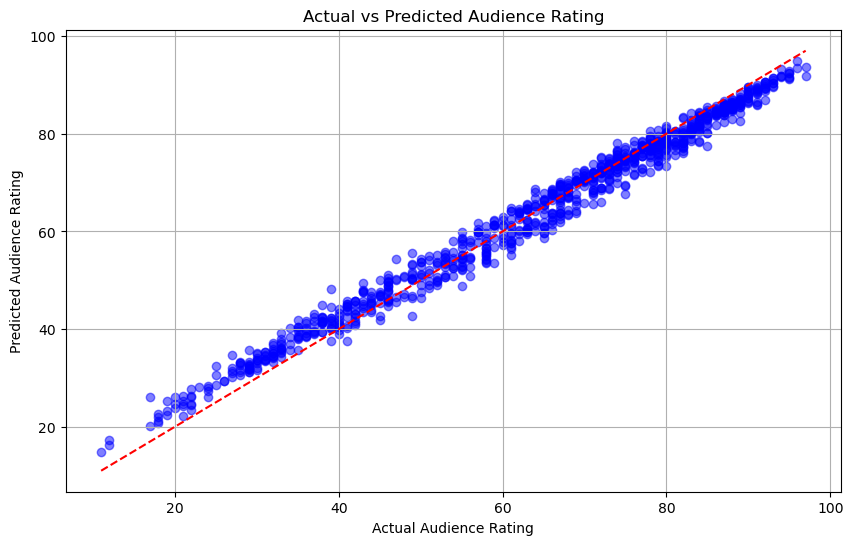

In [13]:
# Plotting Actual vs Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_best, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Actual vs Predicted Audience Rating')
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.grid(True)
plt.show()


# Compare Actual and Predicted Ratings

In [14]:
# Compare predicted ratings with actual ratings
comparison_df = df_clean.copy()  # Use the cleaned DataFrame
comparison_df['Predicted Audience Rating'] = y_pred_best
print(comparison_df[['movie_title', 'audience_rating', 'Predicted Audience Rating']])
# Compare predicted ratings with actual ratings
comparison_df = df_clean.copy()  # Use the cleaned DataFrame
comparison_df['Predicted Audience Rating'] = y_pred_best
print(comparison_df[['movie_title', 'audience_rating', 'Predicted Audience Rating']])


                                           movie_title  audience_rating  \
0    Percy Jackson & the Olympians: The Lightning T...             53.0   
1                                          Please Give             64.0   
2                                                   10             53.0   
3                      12 Angry Men (Twelve Angry Men)             97.0   
4                         20,000 Leagues Under The Sea             74.0   
..                                                 ...              ...   
994                                      Shallow Grave             83.0   
995                                        Bad Company             30.0   
996          Three Colors: Red (Trois couleurs: Rouge)             95.0   
998                                            L'Enfer             74.0   
999                                      Nobody's Fool             81.0   

     Predicted Audience Rating  
0                    50.988377  
1                    68.014540  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compare predicted ratings with actual ratings
comparison_df = df_clean.copy()  # Use the cleaned DataFrame
comparison_df['Predicted Audience Rating'] = y_pred_best

# Print the comparison of actual and predicted ratings
print(comparison_df[['movie_title', 'audience_rating', 'Predicted Audience Rating']])

# Plot the actual vs predicted audience ratings
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(comparison_df['audience_rating'], comparison_df['Predicted Audience Rating'], alpha=0.6)

# Plotting the diagonal line for perfect predictions
plt.plot([comparison_df['audience_rating'].min(), comparison_df['audience_rating'].max()],
         [comparison_df['audience_rating'].min(), comparison_df['audience_rating'].max()], 'r--', lw=2)

# Labels and title
plt.title('Actual vs Predicted Audience Ratings', fontsize=14)
plt.xlabel('Actual Audience Rating', fontsize=12)
plt.ylabel('Predicted Audience Rating', fontsize=12)
plt.grid(True)

# Show plot
plt.show()


# Movie Audience Rating Prediction Project

### What the Project Does:
This project is about predicting how audiences will rate a movie based on different details like the movie’s genre, runtime, critics' reviews, and when it was released.

### Here's how it works:

1. **Getting the Data**:  
   First, I load data about movies, which includes things like the movie’s title, genre, runtime, critic ratings, and release dates.

2. **Cleaning the Data**:  
   We clean the data by fixing missing values, turning text into numbers where needed, and making sure everything is in the right format for the model to understand.

3. **Preparing the Data**:  
   - For numerical data like runtime or critic ratings, we scale them so they all have the same importance during training.
   - For categorical data like genre or rating, we convert them into a format the model can work with, like a series of 1s and 0s.
   - Dates are turned into numbers that the model can use too.

4. **Building the Model**:  
   I create a pipeline that does all of the above steps and then trains a **Random Forest** model to predict the ratings. I also tune the model's settings (like how many trees it should use) to make sure it works as well as possible.

5. **Testing the Model**:  
   After training, we check how well the model did by comparing its predictions to the actual ratings. I also use some metrics to see if the model is good enough.

6. **Making Predictions**:  
   The model is then used to predict ratings for the movies in the dataset. These predictions are saved and compared to the actual ratings to see how close they are.

7. **Visualizing the Results**:  
   I make a graph to show the actual ratings versus the predicted ratings. If the model is perfect, the points will line up on a straight line.


### In Short:
It’s a machine learning project where we predict how audiences will rate movies based on movie details. The process involves cleaning data, training a model, and comparing predictions with actual ratings. We also visualize the results to see how well the model performed.
